# Simple Naive Bayes Example: Same Var (both features)

# Preamble

In [8]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import pylab as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data Points

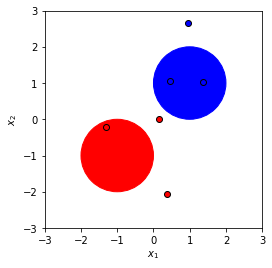

In [14]:
c1_x1 = np.array([0.3682,0.1521,-1.3033])
c1_x2 = np.array([-2.0530,0.0131,-0.2105])
c2_x1 = np.array([0.9456,1.3574,0.4478])
c2_x2 = np.array([2.6543,1.0225,1.0543])

circle1 = plt.Circle((-1, -1), 1, color='r')
circle2 = plt.Circle((1, 1), 1, color='b')

ax = plt.gca()

ax.set_xlim((-3, 3))
ax.set_ylim((-3, 3))
ax.set_aspect('equal')

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")

ax.add_artist(circle1)
ax.add_artist(circle2)

ax.plot(c1_x1,c1_x2,"ro", markeredgecolor='black')
ax.plot(c2_x1,c2_x2,"bo", markeredgecolor='black')
#ax.plot(x,y,'k')

plt.show()

# Estimating Mean

In [10]:
u1x = np.mean(c1_x1)
u1y = np.mean(c1_x2)

u2x = np.mean(c2_x1)
u2y = np.mean(c2_x2)

print(u1x)
print(u1y)
print(u2x)
print(u2y)

-0.26099999999999995
-0.7501333333333333
0.9169333333333333
1.5770333333333333


# Estimating Std

In [11]:
sum1 = np.sum((c1_x1-u1x)**2)
sum2 = np.sum((c1_x2-u1y)**2)
sum3 = np.sum((c2_x1-u2x)**2)
sum4 = np.sum((c2_x2-u2y)**2)

sigmasq = (sum1+sum2+sum3+sum4)/12.0
np.sqrt(sigmasq)

0.729172128741447

# Estimating Weights

In [20]:
# TODO: Double-check derivations here (esp wy)?
wx = (u1x-u2x)/sigmasq
wy = (u1y-u2y)/sigmasq
w0 = -0.5*(u1x**2/sigmasq+u1y**2/sigmasq)+0.5*(u2x**2/sigmasq+u2y**2/sigmasq)

m = -(wx/wy)
c = -(w0/wy)

print(wx)
print(wy)
print(w0)
print(m)
print(c)

-2.215443053690771
-4.376907487504138
2.536223874217369
-0.5061662966411229
0.5794556730884003


# Draw Decision Boundary

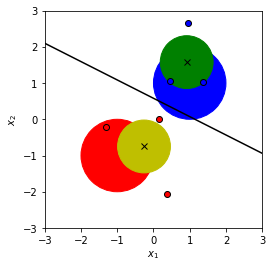

In [21]:
x = np.linspace(-3,3)
y = m*x+c

circle1 = plt.Circle((-1, -1), 1, color='r')
circle2 = plt.Circle((1, 1), 1, color='b')

ax = plt.gca()

ax.set_xlim((-3, 3))
ax.set_ylim((-3, 3))
ax.set_aspect('equal')

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")

ax.add_artist(circle1)
ax.add_artist(circle2)

ax.plot(c1_x1,c1_x2,"ro", markeredgecolor='black')
ax.plot(c2_x1,c2_x2,"bo", markeredgecolor='black')

ax.plot(u1x,u1y,"rx", markeredgecolor='black')
ax.plot(u2x,u2y,"bx", markeredgecolor='black')

circle1data = plt.Circle((u1x, u1y), np.sqrt(sigmasq), color='y')
circle2data = plt.Circle((u2x, u2y), np.sqrt(sigmasq), color='g')
ax.add_artist(circle1data)
ax.add_artist(circle2data)

ax.plot(x,y,'k')

plt.show()
